<a href="https://colab.research.google.com/github/sfeldmanMIG25/MANE4962_Classwork/blob/main/Feldman_Stephen_ML_HW_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stephen Feldman
ML Homework 5

RIN: 662047892

Question 1: Construct a convolutional neural network model for classifying the CIFAR-10 dataset.
Use the test set of the CIFAR-10 dataset as validation data for the model.

(a) (64 pts.) Implement the convolutional neural network architecture given below.

i. The first layer is a 2D convolutional layer with 64 filters, each of size (5, 5),
and uses the ReLU activation function. The input shape of the layer should
correspond to the dimensions of the input image.

ii. The second layer is a max pooling layer of size (2, 2).

iii. The third layer is another 2D convolutional layer with 32 filters, each of size
(3, 3), and uses the ReLU activation function.

iv. The fourth layer is another max pooling layer of size (2, 2).
v. The fifth layer is another 2D convolutional layer with 32 filters, each of size (3,
3), and uses the ReLU activation function.

vi. The sixth layer is a flattened layer which converts the output of the previous
layer into a one-dimensional vector.

vii. The seventh layer is a dense layer with 64 neurons and uses the ReLU activation
function.

viii. The eighth and final layer produces estimated probabilities to classify the
CIFAR-10 classes.

(b) (6 pts.) Calculate and plot the training and validation accuracies of the network
after 10 epochs with a batch size of 64.

In [1]:
#Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# Define the CNN model architecture
model = keras.Sequential([
    layers.Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
# Load and pre-process CIFAR-10 data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
# Train the model using the test set as validation data
history = model.fit(x_train, y_train, epochs=10, batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 101ms/step - accuracy: 0.2872 - loss: 1.9289 - val_accuracy: 0.4647 - val_loss: 1.4755
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 98ms/step - accuracy: 0.4841 - loss: 1.4232 - val_accuracy: 0.5255 - val_loss: 1.3123
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 97ms/step - accuracy: 0.5453 - loss: 1.2712 - val_accuracy: 0.5603 - val_loss: 1.2109
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 103ms/step - accuracy: 0.5877 - loss: 1.1670 - val_accuracy: 0.5926 - val_loss: 1.1460
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 96ms/step - accuracy: 0.6136 - loss: 1.0863 - val_accuracy: 0.6153 - val_loss: 1.0846
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 99ms/step - accuracy: 0.6372 - loss: 1.0237 - val_accuracy: 0.6404 - val_loss: 1.0396
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 96ms/step - accuracy: 0.6569 - loss: 0.9665 - val_accuracy: 0.6308 - val_loss: 1.0420
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 96ms/step - accuracy: 0.6702 - loss: 0.9381 

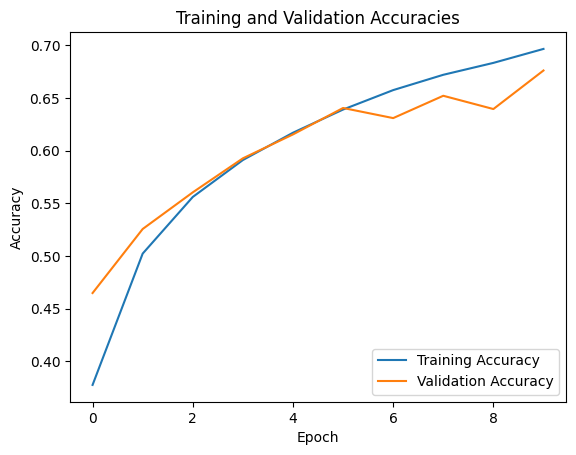

In [6]:
# Plot training and validation accuracies
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracies')
plt.show()

2. Use the Scikit-learn breast cancer Wisconsin dataset and support vector machine classifiers to classify breast cancers. You must use worst compactness, worst concavity, and
worst area features only to perform the classification.

(a) (15 pts.) What is the accuracy of the classification model with a linear kernel?

(b) (15 pts.) What is the accuracy of the classification model with a radial basis function
kernel with regularization strength parameter, C=2?

In [1]:
#imports
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data[:, [27, 28, 29]]  # Select worst compactness, concavity, and area features
y = data.target

In [3]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# (a) Linear kernel
linear_svm = SVC(kernel='linear')
linear_svm.fit(X_train, y_train)
linear_predictions = linear_svm.predict(X_test)
linear_accuracy = accuracy_score(y_test, linear_predictions)
print("Accuracy with linear kernel:", linear_accuracy)


Accuracy with linear kernel: 0.8596491228070176


In [5]:
# (b) Radial basis function (RBF) kernel with C=2
rbf_svm = SVC(kernel='rbf', C=2)
rbf_svm.fit(X_train, y_train)
rbf_predictions = rbf_svm.predict(X_test)
rbf_accuracy = accuracy_score(y_test, rbf_predictions)
print("Accuracy with RBF kernel (C=2):", rbf_accuracy)

Accuracy with RBF kernel (C=2): 0.9210526315789473


a. Accuracy with linear kernel: 0.8596491228070176

b. Accuracy with RBF kernel (C=2): 0.9210526315789473